In [54]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter

In [55]:
def createExamples():
    numberArrayExamples = open('numArEx.txt','a')
    numbersWeHave = range(1,10)
    for eachNum in numbersWeHave:
        for furtherNum in numbersWeHave:

            imgFilePath = 'images/numbers/'+str(eachNum)+'.'+str(furtherNum)+'.png'
            ei = Image.open(imgFilePath)
            eiar = np.array(ei)
            eiarl = str(eiar.tolist())

            lineToWrite = str(eachNum)+'::'+eiarl+'\n'
            numberArrayExamples.write(lineToWrite)

createExamples()

In [56]:
def whatNumIsThis(filePath):

    matchedAr = []
    loadExamps = open('numArEx.txt','r').read()
    loadExamps = loadExamps.split('\n')
    i = Image.open(filePath)
    iar = np.array(i)
    iarl = iar.tolist()
    inQuestion = str(iarl)
    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split('::')
            currentNum = splitEx[0]
            currentAr = splitEx[1]
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')
            x = 0
            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))

                x+=1
        except Exception as e:
            print(str(e))
                
    x = Counter(matchedAr)
    print(x)
    graphX = []
    graphY = []

    ylimi = 0

    for eachThing in x:
        graphX.append(eachThing)
        graphY.append(x[eachThing])
        ylimi = x[eachThing]



    fig = plt.figure()
    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3,colspan=4)
    
    ax1.imshow(iar)
    ax2.bar(graphX,graphY,align='center')
    plt.ylim(400)
    
    xloc = plt.MaxNLocator(12)
    ax2.xaxis.set_major_locator(xloc)

    plt.show()


list index out of range
Counter({9: 480, 3: 455, 6: 430, 8: 429, 5: 427, 2: 415, 4: 399, 7: 380, 1: 333})


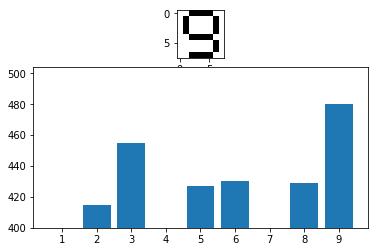

In [58]:
whatNumIsThis('images/numbers/9.3.png')